## Composites based on overturning anomalies and MHT anomalies

Another approach to create composites is to isolate members that have positive or negative anomalies in overturning/MHt at a fixed time. We check this approach here by isolating ensemble members that anamalous geostrophic overturning (at $\sigma=27.6$) and MHT at $50^{\circ}$N. Since oceans evolve slowly, we look for extreme values averaged over 2-3 years rather than a season, as in composites based on NAO values.    

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
data_dir =  "/gws/nopw/j04/snapdragon/hkhatri/DePreSys4/Data_Consolidated/Overturning_Heat_Salt_Transport_Baro_Decompose/"

ds = xr.open_dataset(data_dir + "Overturning_Heat_Salt_Transport_r1.nc", chunks={'start_year':1})

ds = ds.assign_coords(j_c=ds['latitude'].isel(start_year=0).drop('start_year'))

print(ds)

<xarray.Dataset>
Dimensions:                           (start_year: 57, j_c: 450, time: 125,
                                       lev: 75, sigma0: 48, sigma0_outer: 49,
                                       lat: 153, lev_outer: 76)
Coordinates:
  * j_c                               (j_c) float32 4.121 4.371 ... 75.82 75.9
  * lev                               (lev) float64 0.5058 1.556 ... 5.902e+03
  * sigma0                            (sigma0) float64 16.0 18.0 ... 29.5 30.5
  * sigma0_outer                      (sigma0_outer) float64 15.0 17.0 ... 31.0
  * lev_outer                         (lev_outer) float64 0.0 ... 6.004e+03
  * lat                               (lat) float64 0.2778 0.8333 ... 84.72
  * start_year                        (start_year) int64 1960 1961 ... 2015 2016
Dimensions without coordinates: time
Data variables: (12/28)
    latitude                          (start_year, j_c) float32 dask.array<chunksize=(1, 450), meta=np.ndarray>
    Overturning_z            

In [3]:
ds = ds.isel(j_c=225, lat = 89) # to get values closest to 50N. j_c = 49.95, lat = 49.72

print(ds)

<xarray.Dataset>
Dimensions:                           (start_year: 57, time: 125, lev: 75,
                                       sigma0: 48, sigma0_outer: 49,
                                       lev_outer: 76)
Coordinates:
    j_c                               float32 49.97
  * lev                               (lev) float64 0.5058 1.556 ... 5.902e+03
  * sigma0                            (sigma0) float64 16.0 18.0 ... 29.5 30.5
  * sigma0_outer                      (sigma0_outer) float64 15.0 17.0 ... 31.0
  * lev_outer                         (lev_outer) float64 0.0 ... 6.004e+03
    lat                               float64 49.72
  * start_year                        (start_year) int64 1960 1961 ... 2015 2016
Dimensions without coordinates: time
Data variables: (12/28)
    latitude                          (start_year) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    Overturning_z                     (start_year, time, lev) float32 dask.array<chunksize=(1, 125, 75), meta

In [4]:
# Read data drift

data_drift_dir = "/gws/nopw/j04/snapdragon/hkhatri/DePreSys4/Data_Drift/"

ds_drift = []
    
for lead_year in range(0, 11):
        
    d = xr.open_dataset(data_drift_dir + "psi_sigma/Drift_Overturning_r1_Lead_Year_" +
                        str(lead_year + 1) + ".nc", decode_times= False)
        
    d = d.assign(time = np.arange(lead_year*12, 12*lead_year + 
                                  np.minimum(12, len(d['time'])), 1))
        
    ds_drift.append(d)
        
ds_drift = xr.concat(ds_drift, dim='time')

ds_drift = ds_drift.drop('j_c')
ds_drift = ds_drift.assign_coords(j_c=ds_drift['latitude'].isel(time=0).drop('time'))

ds_drift = ds_drift.isel(j_c=225, lat = 89) # to get values closest to 50N. j_c = 49.95, lat = 49.72

print(ds_drift)

<xarray.Dataset>
Dimensions:                           (time: 125, lev: 75, sigma0: 48,
                                       sigma0_outer: 49, lev_outer: 76)
Coordinates:
  * lev                               (lev) float64 0.5058 1.556 ... 5.902e+03
  * sigma0                            (sigma0) float64 16.0 18.0 ... 29.5 30.5
  * sigma0_outer                      (sigma0_outer) float64 15.0 17.0 ... 31.0
  * lev_outer                         (lev_outer) float64 0.0 ... 6.004e+03
    lat                               float64 49.72
  * time                              (time) int64 0 1 2 3 4 ... 121 122 123 124
    j_c                               float32 49.97
Data variables: (12/30)
    latitude                          (time) float32 49.97 49.97 ... 49.97 49.97
    Overturning_z                     (time, lev) float32 -1.721e+04 ... -1.4...
    Overturning_z_barotropic          (time, lev) float32 -323.8 ... -1.416e+06
    Overturning_sigma                 (time, sigma0) float32 0

In [5]:
# Get the NAO timeseries for r1

ppdir_NAO="/home/users/hkhatri/DePreSys4_Data/Data_Anomaly_Compute/NAO/"
ds_NAO = xr.open_dataset(ppdir_NAO + "NAO_SLP_Anomaly_new.nc")

ds_NAO = ds_NAO.isel(r=0) # corresponding to r1 ensemble

NAO = (ds_NAO['P_south'] - ds_NAO['P_north']) # for NAO indices in pa

tim = ds_NAO['time_val'].isel(start_year=0).drop('start_year')
NAO = NAO.assign_coords(time=tim)

NAO = NAO.isel(time=slice(1,len(NAO.time)-1)) # get rid of first Nov and last Mar for seasonal avg
NAO_season = NAO.resample(time='QS-DEC').mean('time')

print(ds_NAO)

<xarray.Dataset>
Dimensions:     (start_year: 57, time: 125)
Coordinates:
  * start_year  (start_year) int64 1960 1961 1962 1963 ... 2013 2014 2015 2016
Dimensions without coordinates: time
Data variables:
    NAO         (start_year, time) float64 ...
    P_south     (start_year, time) float64 ...
    P_north     (start_year, time) float64 ...
    time_val    (start_year, time) object ...


In [6]:
# Remove model drift to get anomalies

ds1 = (ds - ds_drift).assign_coords(time=tim)

print(ds1)

<xarray.Dataset>
Dimensions:                           (lev: 75, sigma0: 48, sigma0_outer: 49,
                                       lev_outer: 76, start_year: 57, time: 125)
Coordinates:
  * lev                               (lev) float64 0.5058 1.556 ... 5.902e+03
  * sigma0                            (sigma0) float64 16.0 18.0 ... 29.5 30.5
  * sigma0_outer                      (sigma0_outer) float64 15.0 17.0 ... 31.0
  * lev_outer                         (lev_outer) float64 0.0 ... 6.004e+03
    lat                               float64 49.72
  * start_year                        (start_year) int64 1960 1961 ... 2015 2016
  * time                              (time) object 1960-11-16 00:00:00 ... 1...
Data variables: (12/28)
    latitude                          (start_year, time) float32 dask.array<chunksize=(1, 125), meta=np.ndarray>
    Overturning_z                     (start_year, time, lev) float32 dask.array<chunksize=(1, 125, 75), meta=np.ndarray>
    Overturning_z_barotr

### Composites based on geostrophic overturning anomalies 


In [7]:
year1, year2 = (1963, 1965) # get 3-yr averages

ds1['time.year']

<xarray.DataArray 'year' (time: 125)>
array([1960, 1960, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
       1961, 1961, 1961, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1963, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965,
       1965, 1965, 1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967,
       1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968,
       1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1969,
       1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969,
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       1970, 1971, 1971, 1971])
Coordinates:
    lat      float64 49.72
  * time     (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00

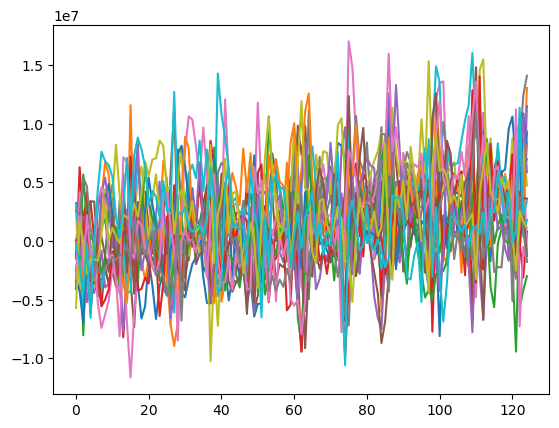

In [10]:
for i in range(0,20):

    plt.plot((ds1['Overturning_sigma'] - ds1['Overturning_sigma_barotropic']).isel(start_year=i).sel(sigma0=27.55, method='nearest'))

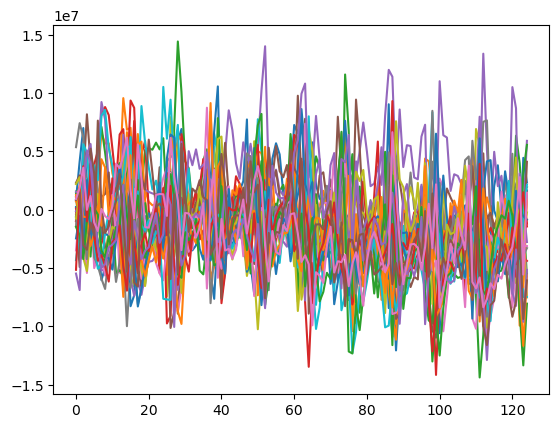

In [11]:
for i in range(30,57):

    plt.plot((ds1['Overturning_sigma'] - ds1['Overturning_sigma_barotropic']).isel(start_year=i).sel(sigma0=27.55, method='nearest'))

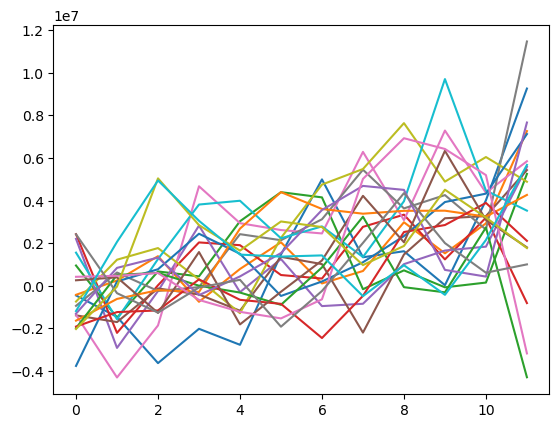

In [12]:
ds2 = ds1.groupby('time.year').mean('time')

for i in range(0,20):

    plt.plot((ds2['Overturning_sigma'] - ds2['Overturning_sigma_barotropic']).isel(start_year=i).sel(sigma0=27.55, method='nearest'))

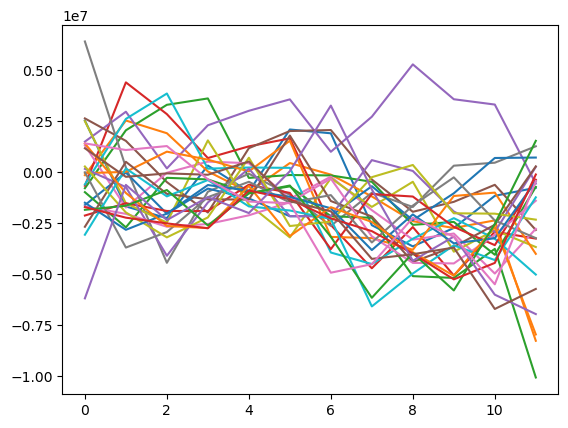

In [13]:
for i in range(30,57):

    plt.plot((ds2['Overturning_sigma'] - ds2['Overturning_sigma_barotropic']).isel(start_year=i).sel(sigma0=27.55, method='nearest'))

### Composites based on MHT anomalies 

MHT composites may work better as there are no decadal trends in MHT diagnostics.

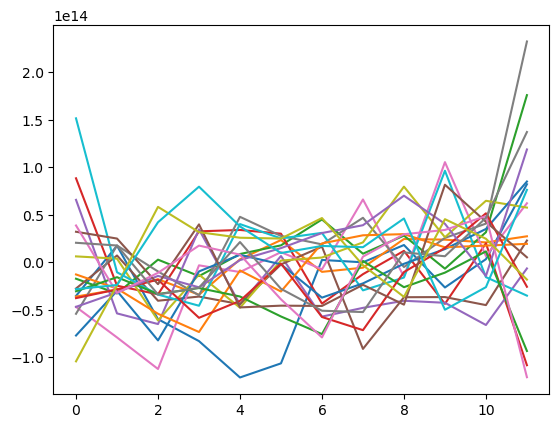

In [18]:
for i in range(0,20):

    plt.plot((ds2['MHT_z'] - ds2['MHT_z_baro']).isel(start_year=i).sum('lev'))

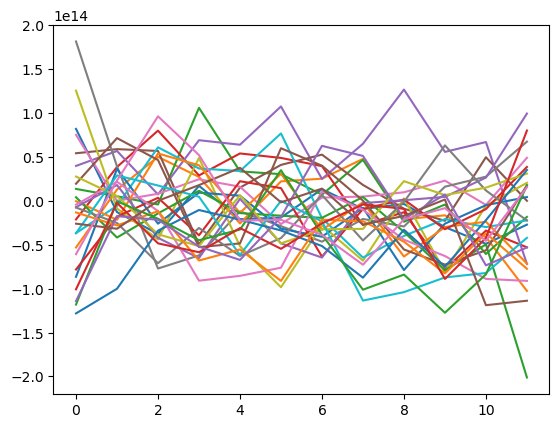

In [19]:
for i in range(30,57):

    plt.plot((ds2['MHT_z'] - ds2['MHT_z_baro']).isel(start_year=i).sum('lev'))

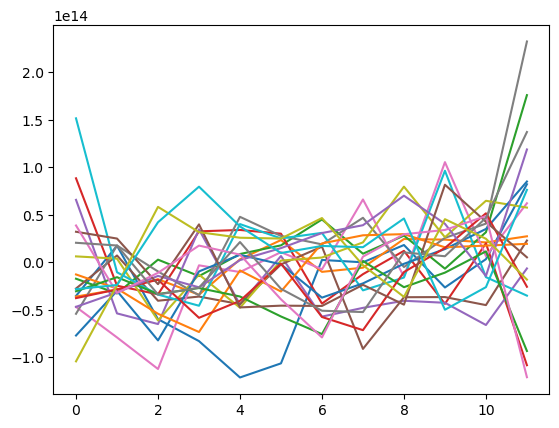

In [20]:
for i in range(0,20):

    plt.plot((ds2['MHT_sigma'] - ds2['MHT_sigma_baro']).isel(start_year=i).sum('sigma0'))

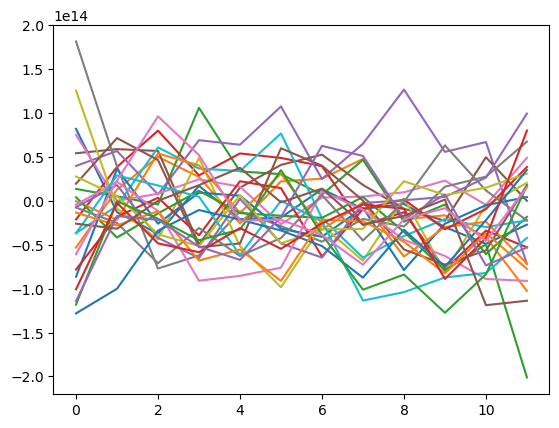

In [21]:
for i in range(30,57):

    plt.plot((ds2['MHT_sigma'] - ds2['MHT_sigma_baro']).isel(start_year=i).sum('sigma0'))

In [22]:
def mean_data(ds, year1, year2):

    tmp = ds.sel(time = ds['time.year'] >= year1) 
    tmp = ds.sel(time = ds['time.year'] <= year2)
    
    ds_mean = tmp.mean('time')

    return ds_mean

In [60]:
year1, year2 = (1964, 1966) # get 3-yr averages

MHT = (ds1['MHT_z'] - ds1['MHT_z_baro']).sum('lev')

MHT_mean = mean_data(MHT, year1, year2)

print(MHT_mean)

<xarray.DataArray (start_year: 57)>
dask.array<mean_agg-aggregate, shape=(57,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat         float64 49.72
  * start_year  (start_year) int64 1960 1961 1962 1963 ... 2013 2014 2015 2016


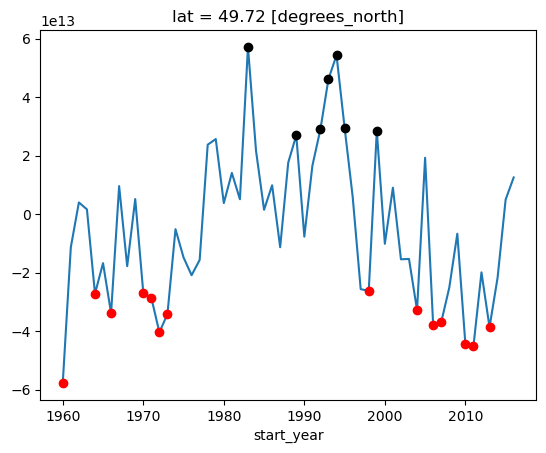

In [61]:
MHT_cut = MHT_mean.std('start_year').values

MHT_mean.plot()

for i in range(0,57):

    if (MHT_mean.isel(start_year=i) > MHT_cut):

        plt.plot(i+1960, MHT_mean.isel(start_year=i), 'o', color='k')

    elif (MHT_mean.isel(start_year=i) < -MHT_cut):

        plt.plot(i+1960, MHT_mean.isel(start_year=i), 'o', color='r')

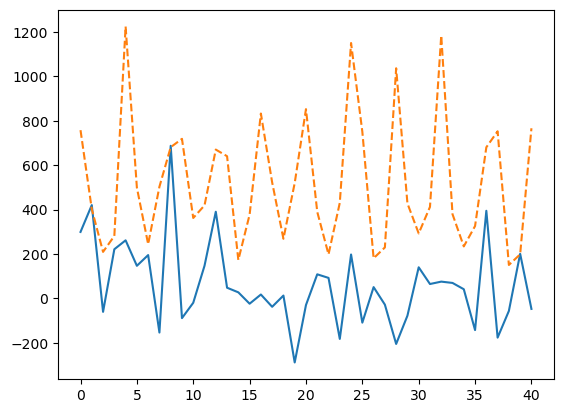

In [62]:
NAO_comp = NAO_season.where(MHT_mean > MHT_cut)

plt.plot(NAO_comp.mean('start_year'))
plt.plot(NAO_comp.std('start_year'), '--')

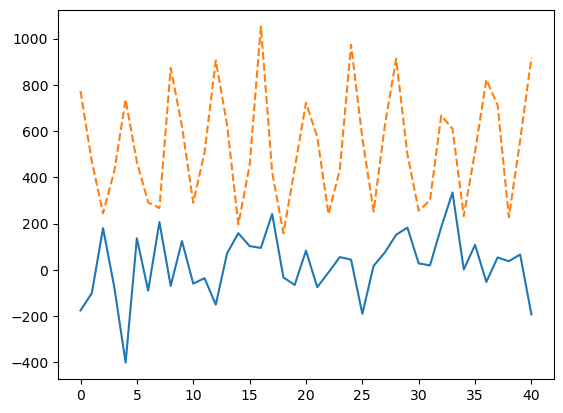

In [63]:
NAO_comp = NAO_season.where(MHT_mean < -MHT_cut)

plt.plot(NAO_comp.mean('start_year'))
plt.plot(NAO_comp.std('start_year'), '--')

In [59]:
ds1['time.year']

<xarray.DataArray 'year' (time: 125)>
array([1960, 1960, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961, 1961,
       1961, 1961, 1961, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1962, 1963, 1963, 1963, 1963, 1963, 1963, 1963,
       1963, 1963, 1963, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1964, 1964, 1964, 1964, 1965, 1965, 1965, 1965, 1965,
       1965, 1965, 1965, 1965, 1965, 1965, 1965, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1967, 1967, 1967,
       1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1967, 1968, 1968,
       1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1968, 1969,
       1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969, 1969,
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       1970, 1971, 1971, 1971])
Coordinates:
    lat      float64 49.72
  * time     (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00

In [68]:
 ds1.time.dt.daysinmonth

<xarray.DataArray 'days_in_month' (time: 125)>
array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30])
Coordinates:
    lat      float64 49.72
  * time     (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00

In [64]:
def mean_data(ds, year1, year2):

    tmp_mean = ds.mean('time')
    
    tmp = ds.sel(time = ds['time.year'] >= year1) 
    tmp = ds.sel(time = ds['time.year'] <= year2)
    
    ds_mean = tmp.mean('time') - tmp_mean

    return ds_mean

In [65]:
year1, year2 = (1964, 1966) # get 3-yr averages

MHT = (ds1['MHT_z'] - ds1['MHT_z_baro']).sum('lev')

MHT_mean = mean_data(MHT, year1, year2)

print(MHT_mean)

<xarray.DataArray (start_year: 57)>
dask.array<sub, shape=(57,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat         float64 49.72
  * start_year  (start_year) int64 1960 1961 1962 1963 ... 2013 2014 2015 2016


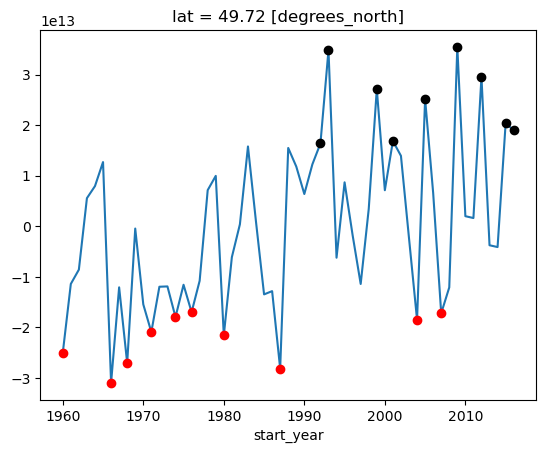

In [66]:
MHT_cut = MHT_mean.std('start_year').values

MHT_mean.plot()

for i in range(0,57):

    if (MHT_mean.isel(start_year=i) > MHT_cut):

        plt.plot(i+1960, MHT_mean.isel(start_year=i), 'o', color='k')

    elif (MHT_mean.isel(start_year=i) < -MHT_cut):

        plt.plot(i+1960, MHT_mean.isel(start_year=i), 'o', color='r')

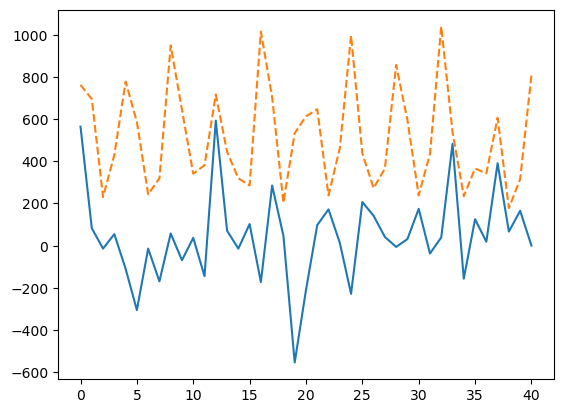

In [67]:
NAO_comp = NAO_season.where(MHT_mean > MHT_cut)

plt.plot(NAO_comp.mean('start_year'))
plt.plot(NAO_comp.std('start_year'), '--')

## Check data we created for all the full data using the method tested above

In [3]:
data_dir =  "/gws/nopw/j04/snapdragon/hkhatri/DePreSys4/Data_Composite/Overturning_MHT/"

ds_mean = xr.open_dataset(data_dir + "MHT_Overturning_456yr.nc")

print(ds_mean)

<xarray.Dataset>
Dimensions:           (r: 10, start_year: 57)
Coordinates:
    lat               float64 ...
  * start_year        (start_year) int64 1960 1961 1962 1963 ... 2014 2015 2016
    sigma0            float64 ...
Dimensions without coordinates: r
Data variables:
    MHT_mean          (r, start_year) float32 ...
    MHT_mean_anom     (r, start_year) float32 ...
    Psi_mean          (r, start_year) float32 ...
    Psi_mean_anom     (r, start_year) float32 ...
    Psimax_mean       (r, start_year) float32 ...
    Psimax_mean_anom  (r, start_year) float32 ...


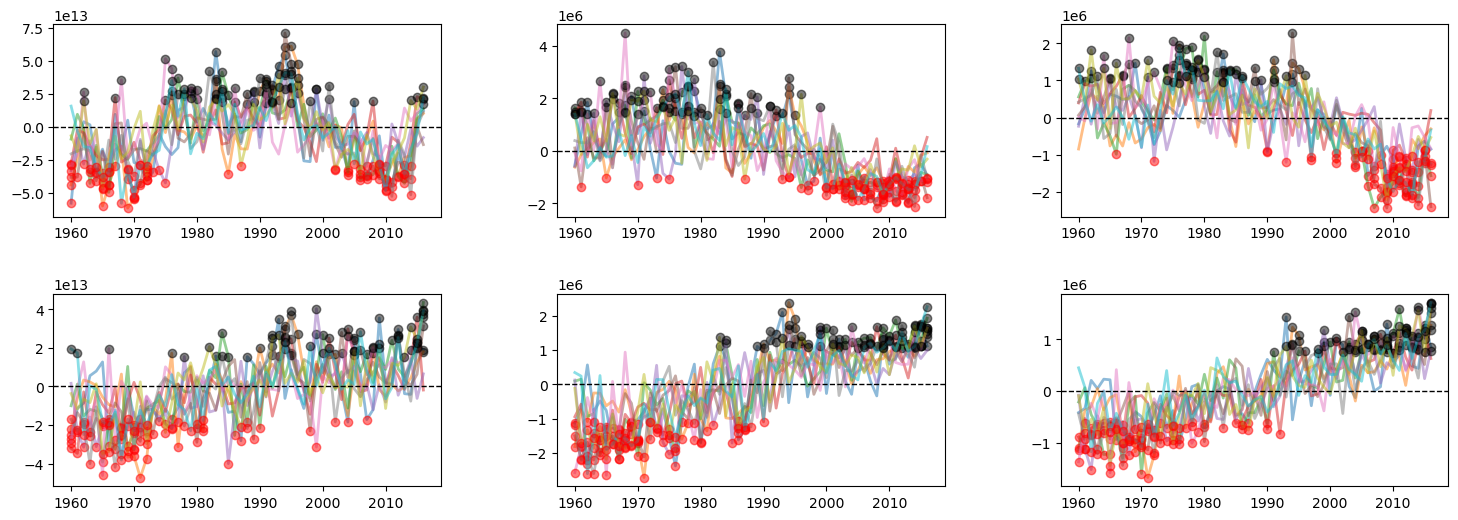

In [6]:
grid1 = plt.GridSpec(2, 3, wspace=0.3, hspace=0.4)
fig = plt.figure(figsize=[18,6])

count_p = 0; count_n = 0
count_p1 = 0; count_n1 = 0
count_p2 = 0; count_n2 = 0

coeff = 1.0
mean_rem = 1. # 1. to remove; otherwis 0

ax = fig.add_subplot(grid1[0, 0])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['MHT_mean'].isel(r=i), lw=2, alpha=0.5)

    MHT_cut = coeff * ds_mean['MHT_mean'].std(['start_year', 'r']) #+ mean_rem * ds_mean['MHT_mean'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.MHT_mean.isel(start_year=j,r=i) > MHT_cut + mean_rem * ds_mean['MHT_mean'].mean(['start_year', 'r'])):
            count_p = count_p + 1
            plt.plot(j+1960, ds_mean.MHT_mean.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.MHT_mean.isel(start_year=j, r=i) < mean_rem * ds_mean['MHT_mean'].mean(['start_year', 'r']) - MHT_cut):
            plt.plot(j+1960, ds_mean.MHT_mean.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            count_n = count_n + 1
        
ax.axhline(y=0., ls='--', lw=1, color='k')

ax = fig.add_subplot(grid1[1, 0])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['MHT_mean_anom'].isel(r=i), lw=2, alpha=0.5)

    MHT_cut = coeff*ds_mean['MHT_mean_anom'].std(['start_year', 'r']) #+ mean_rem * ds_mean['MHT_mean_anom'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.MHT_mean_anom.isel(start_year=j,r=i) > MHT_cut + mean_rem * ds_mean['MHT_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.MHT_mean_anom.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.MHT_mean_anom.isel(start_year=j, r=i) < - MHT_cut + mean_rem * ds_mean['MHT_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.MHT_mean_anom.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            
ax.axhline(y=0., ls='--', lw=1, color='k')

ax = fig.add_subplot(grid1[0, 1])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['Psi_mean'].isel(r=i), lw=2, alpha=0.5)

    Psi_cut = coeff*ds_mean['Psi_mean'].std(['start_year', 'r']) #+ mean_rem * ds_mean['Psi_mean'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.Psi_mean.isel(start_year=j,r=i) > Psi_cut + mean_rem * ds_mean['Psi_mean'].mean(['start_year', 'r'])):
            count_p1 = count_p1 + 1
            plt.plot(j+1960, ds_mean.Psi_mean.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.Psi_mean.isel(start_year=j, r=i) < -Psi_cut + mean_rem * ds_mean['Psi_mean'].mean(['start_year', 'r'])):
            count_n1 = count_n1 + 1
            plt.plot(j+1960, ds_mean.Psi_mean.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            
ax.axhline(y=0., ls='--', lw=1, color='k')

ax = fig.add_subplot(grid1[1, 1])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['Psi_mean_anom'].isel(r=i), lw=2, alpha=0.5)

    Psi_cut = coeff*ds_mean['Psi_mean_anom'].std(['start_year', 'r']) #+ mean_rem * ds_mean['Psi_mean_anom'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.Psi_mean_anom.isel(start_year=j,r=i) > Psi_cut + mean_rem * ds_mean['Psi_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.Psi_mean_anom.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.Psi_mean_anom.isel(start_year=j, r=i) < -Psi_cut + mean_rem * ds_mean['Psi_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.Psi_mean_anom.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            
ax.axhline(y=0., ls='--', lw=1, color='k')

ax = fig.add_subplot(grid1[0, 2])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['Psimax_mean'].isel(r=i), lw=2, alpha=0.5)

    Psi_cut = coeff*ds_mean['Psimax_mean'].std(['start_year', 'r']) #+ mean_rem * ds_mean['Psimax_mean'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.Psimax_mean.isel(start_year=j,r=i) > Psi_cut + mean_rem * ds_mean['Psimax_mean'].mean(['start_year', 'r'])):
            count_p2 = count_p2 + 1
            plt.plot(j+1960, ds_mean.Psimax_mean.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.Psimax_mean.isel(start_year=j, r=i) < -Psi_cut + mean_rem * ds_mean['Psimax_mean'].mean(['start_year', 'r'])):
            count_n2 = count_n2 + 1
            plt.plot(j+1960, ds_mean.Psimax_mean.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            
ax.axhline(y=0., ls='--', lw=1, color='k')

ax = fig.add_subplot(grid1[1, 2])
for i in range(0,10):
    ax.plot(ds_mean['start_year'], ds_mean['Psimax_mean_anom'].isel(r=i), lw=2, alpha=0.5)

    Psi_cut = coeff*ds_mean['Psimax_mean_anom'].std(['start_year', 'r']) #+ mean_rem * ds_mean['Psimax_mean_anom'].mean(['start_year', 'r'])
    for j in range(0,57):
        if (ds_mean.Psimax_mean_anom.isel(start_year=j,r=i) > Psi_cut + mean_rem * ds_mean['Psimax_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.Psimax_mean_anom.isel(start_year=j, r=i), 'o', color='k', alpha=0.5)
        elif (ds_mean.Psimax_mean_anom.isel(start_year=j, r=i) < -Psi_cut + mean_rem * ds_mean['Psimax_mean_anom'].mean(['start_year', 'r'])):
            plt.plot(j+1960, ds_mean.Psimax_mean_anom.isel(start_year=j, r=i), 'o', color='r', alpha=0.5)
            
ax.axhline(y=0., ls='--', lw=1, color='k')

In [44]:
print("outside alpha x sigma, alpha = ", coeff)
print(count_p, count_n)
print(count_p1, count_n1)
print(count_p2, count_n2)

outside alpha x sigma, alpha =  1.0
66 128
114 79
87 82


In [46]:
print("outside alpha x sigma, alpha = ", coeff)
print(count_p, count_n)
print(count_p1, count_n1)
print(count_p2, count_n2)

outside alpha x sigma, alpha =  1.5
26 63
52 16
28 47


In [7]:
print("outside mean +- alpha x sigma, alpha = ", coeff)
print(count_p, count_n)
print(count_p1, count_n1)
print(count_p2, count_n2)

outside mean +- alpha x sigma, alpha =  1.0
92 96
96 103
83 89


In [5]:
print("outside mean +- alpha x sigma, alpha = ", coeff)
print(count_p, count_n)
print(count_p1, count_n1)
print(count_p2, count_n2)

outside mean +- alpha x sigma, alpha =  1.5
40 36
44 29
27 50
